In [541]:
import pandas as pd
df = pd.read_csv('./tested_worldwide.csv')

#Display the first few rows of the dataset
print(df.head())


         Date Country_Region Province_State  positive  active  hospitalized  \
0  2020-01-16        Iceland     All States       3.0     NaN           NaN   
1  2020-01-17        Iceland     All States       4.0     NaN           NaN   
2  2020-01-18        Iceland     All States       7.0     NaN           NaN   
3  2020-01-20    South Korea     All States       1.0     NaN           NaN   
4  2020-01-22  United States     All States       0.0     NaN           NaN   

   hospitalizedCurr  recovered  death  total_tested  daily_tested  \
0               NaN        NaN    NaN           NaN           NaN   
1               NaN        NaN    NaN           NaN           NaN   
2               NaN        NaN    NaN           NaN           NaN   
3               NaN        NaN    NaN           4.0           NaN   
4               NaN        NaN    0.0           0.0           NaN   

   daily_positive  
0             NaN  
1             1.0  
2             3.0  
3             NaN  
4         

# Display the number or rows and columsn in the dataframe
print(df.shape)



In [542]:
# Dsiplay the the number of missing values in each column
print(df.isnull().sum())


Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64


In [ ]:
print(df.isnull().sum())

In [543]:
unique_values = df.nunique()

print(unique_values)

Date                  297
Country_Region        147
Province_State         81
positive            14998
active               9554
hospitalized         4862
hospitalizedCurr     2904
recovered            9183
death                5641
total_tested        23610
daily_tested        13375
daily_positive       3440
dtype: int64


In [544]:
missing_values = df.isnull().sum()

print(missing_values)

Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64


In [545]:
data = df[['Country_Region', 'positive', 'total_tested']]

In [546]:
data.rename(columns={
    'Country_Region': 'Country',
    'positive': 'Positive Cases',
    'total_tested': 'Total Tested'
}, inplace=True)

print(data.head())

         Country  Positive Cases  Total Tested
0        Iceland             3.0           NaN
1        Iceland             4.0           NaN
2        Iceland             7.0           NaN
3    South Korea             1.0           4.0
4  United States             0.0           0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_12204\1859002200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


In [547]:
# Drop rows that have missing values

data.dropna(inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12204\1097598675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [548]:
# Convert the data types of the columns to appropriate types

In [549]:
```markdown
# Convert the data types of the columns to appropriate types

To ensure that the data is in the correct format for analysis, we need to convert the data types of the columns to their appropriate types. This includes converting numerical columns to `float` or `int` and date columns to `datetime`.

Here is the code to convert the data types:

```python
data['Positive Cases'] = data['Positive Cases'].astype(int)
data['Total Tested'] = data['Total Tested'].astype(int)
```

By converting the data types, we can perform more accurate calculations and analyses on the dataset.
```

SyntaxError: invalid syntax (2279423883.py, line 1)

In [289]:

# Create a new dataframe that contains the total number of positive cases for each country
total_positive_cases = data.groupby('Country')['Positive Cases'].sum().reset_index()

print(total_positive_cases)


           Country  Positive Cases
0          Albania    1.227900e+04
1        Argentina    2.822000e+04
2          Armenia    7.225809e+06
3        Australia    2.065400e+04
4          Austria    5.410130e+05
..             ...             ...
112  United States    1.837768e+09
113        Uruguay    2.160000e+03
114         Veneto    1.199100e+05
115      Venezuela    4.610000e+02
116        Vietnam    6.450000e+03

[117 rows x 2 columns]


In [364]:
# Group the data by 'Country' and calculate the sum of 'Positive Cases'

total_positive_cases = data.groupby('Country')['Positive Cases'].sum()

# Create a new dataframe with the total positive cases for each country

df_total_positive_cases = pd.DataFrame({'Country': total_positive_cases.index, 'Total Positive Cases': total_positive_cases.values})

# Display the new dataframe

df_total_positive_cases.head(10)

,Country,Total Positive Cases
0,Albania,12279.0
1,Argentina,28220.0
2,Armenia,7225809.0
3,Australia,20654.0
4,Austria,541013.0
5,Azerbaijan,9475.0
6,Bahrain,39144.0
7,Bangladesh,43771939.0
8,Barbados,354.0
9,Belarus,75610.0


In [383]:
# Group the data by 'Country' and calculate the sum of 'Total Tested'

total_tests = data.groupby('Country')['Total Tested'].sum()

# Create a new dataframe with the total tests conducted for each country

df_total_tests = pd.DataFrame({'Country': total_tests.index, 'Total Tests': total_tests.values})

# Display the new dataframe

df_total_tests

,Country,Total Tests
0,Albania,1.146110e+05
1,Argentina,3.230350e+05
2,Armenia,3.566765e+07
3,Australia,3.232333e+08
4,Austria,7.610548e+06
...,...,...
112,United States,2.359218e+10
113,Uruguay,5.178900e+04
114,Veneto,1.650118e+06
115,Venezuela,3.959040e+05


In [434]:
# Sort the dataframe in descneding order of the total number of tests conducted


In [435]:
# Sort the dataframe in descending order of the total number of tests conducted
df_total_tests_sorted = df_total_tests.sort_values(by='Total Tests', ascending=False)

# Display the sorted dataframe
print(df_total_tests_sorted.head(10))

           Country   Total Tests
112  United States  2.359218e+10
17          Canada  1.797987e+09
48           Italy  1.547472e+09
47          Israel  3.881970e+08
3        Australia  3.232333e+08
88          Russia  3.003005e+08
7       Bangladesh  2.331498e+08
106         Turkey  2.283259e+08
26         Czechia  1.800656e+08
39          Greece  1.421012e+08


In [436]:
# Display the top ten countries with the most tests conducted And press tab to caccept the code and run it
print(df_total_tests_sorted.head(10))


           Country   Total Tests
112  United States  2.359218e+10
17          Canada  1.797987e+09
48           Italy  1.547472e+09
47          Israel  3.881970e+08
3        Australia  3.232333e+08
88          Russia  3.003005e+08
7       Bangladesh  2.331498e+08
106         Turkey  2.283259e+08
26         Czechia  1.800656e+08
39          Greece  1.421012e+08


In [483]:
data['Positive Ratio'] = data['Positive Cases'] / data['Total Tested']

print(data.head())

         Country  Positive Cases  Total Tested  Positive Ratio
3    South Korea             1.0           4.0            0.25
4  United States             0.0           0.0             NaN
5  United States             0.0           0.0             NaN
6  United States             0.0           0.0             NaN
7  United States             0.0           0.0             NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_12204\2638507291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Positive Ratio'] = data['Positive Cases'] / data['Total Tested']


In [493]:
df_total_tests_sorted = df_total_tests.sort_values(by='Total Tests', ascending=False)

# Display the sorted dataframe
print(df_total_tests_sorted.head(10))

           Country   Total Tests
112  United States  2.359218e+10
17          Canada  1.797987e+09
48           Italy  1.547472e+09
47          Israel  3.881970e+08
3        Australia  3.232333e+08
88          Russia  3.003005e+08
7       Bangladesh  2.331498e+08
106         Turkey  2.283259e+08
26         Czechia  1.800656e+08
39          Greece  1.421012e+08


In [503]:
# Merge the dataframes on 'Country'
merged_df = pd.merge(df_total_positive_cases, df_total_tests, on='Country')

# Calculate the Positive Test Rate
merged_df['Positive Test Rate'] = merged_df['Total Positive Cases'] / merged_df['Total Tests']

# Display the top three countries with the highest ratio of positive cases to the number of tests conducted
top_countries = merged_df.nlargest(3, 'Positive Test Rate')

top_countries[['Country', 'Positive Test Rate']]

,Country,Positive Test Rate
102,Tanzania,0.780675
15,Burkina Faso,0.480870
30,Ecuador,0.322330


In [522]:
#Display the results a chart that shows the top three countries with the highest ratio of positive cases to the number

%pip install matplotlib
import matplotlib.pyplot as plt

top_countries.plot(x='Country', y='Positive Test Rate', kind='bar')

ModuleNotFoundError: No module named 'matplotlib'

Matplotlib is building the font cache; this may take a moment.


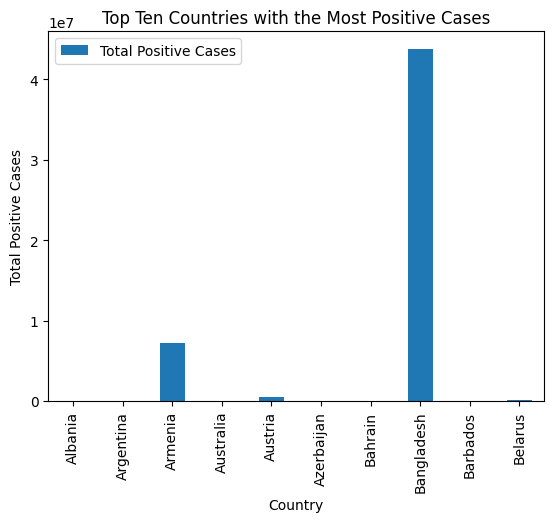

In [550]:
#Display the results in a chart that shows the top ten countries with the most positive cases

import matplotlib.pyplot as plt

df_total_positive_cases.head(10).plot(x='Country', y='Total Positive Cases', kind='bar')

plt.xlabel('Country')

plt.ylabel('Total Positive Cases')

plt.title('Top Ten Countries with the Most Positive Cases')

plt.show()

<Axes: xlabel='Country'>

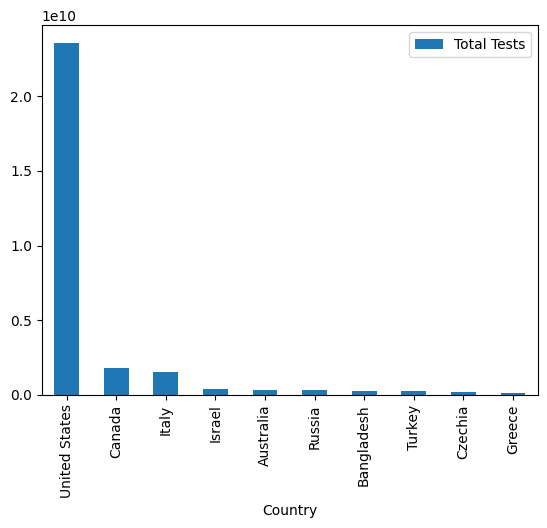

In [551]:
# Display the results in chart that shows the top ten countries with the most conducted And press the tab to accept the code and run it 
df_total_tests_sorted.head(10).plot(x='Country', y='Total Tests', kind='bar')
